<a href="https://colab.research.google.com/github/Ndy-S/machine-learning-fundamental/blob/main/Introduction%20to%20TensorFlow%20for%20Artificial%20Intelligence%2C%20Machine%20Learning%2C%20and%20Deep%20Learning/W3_computer_vision_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enhancing Computer Vision with CNN

## What are Convolutions and Pooling
### Convolutions

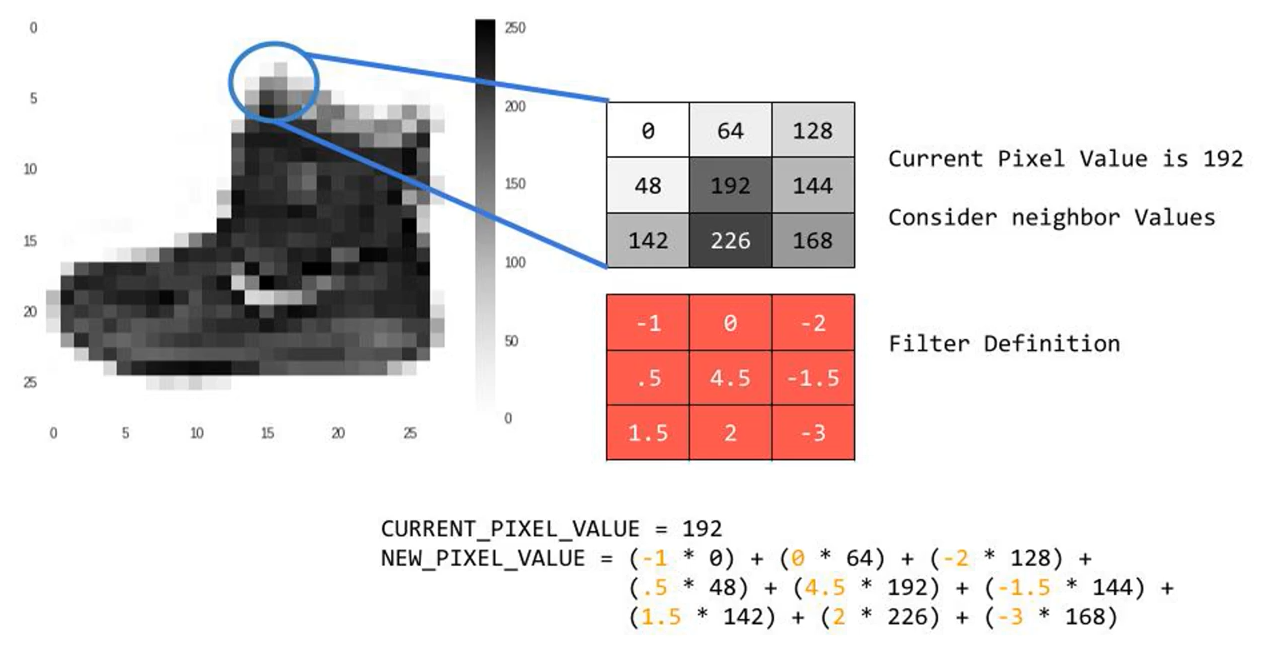

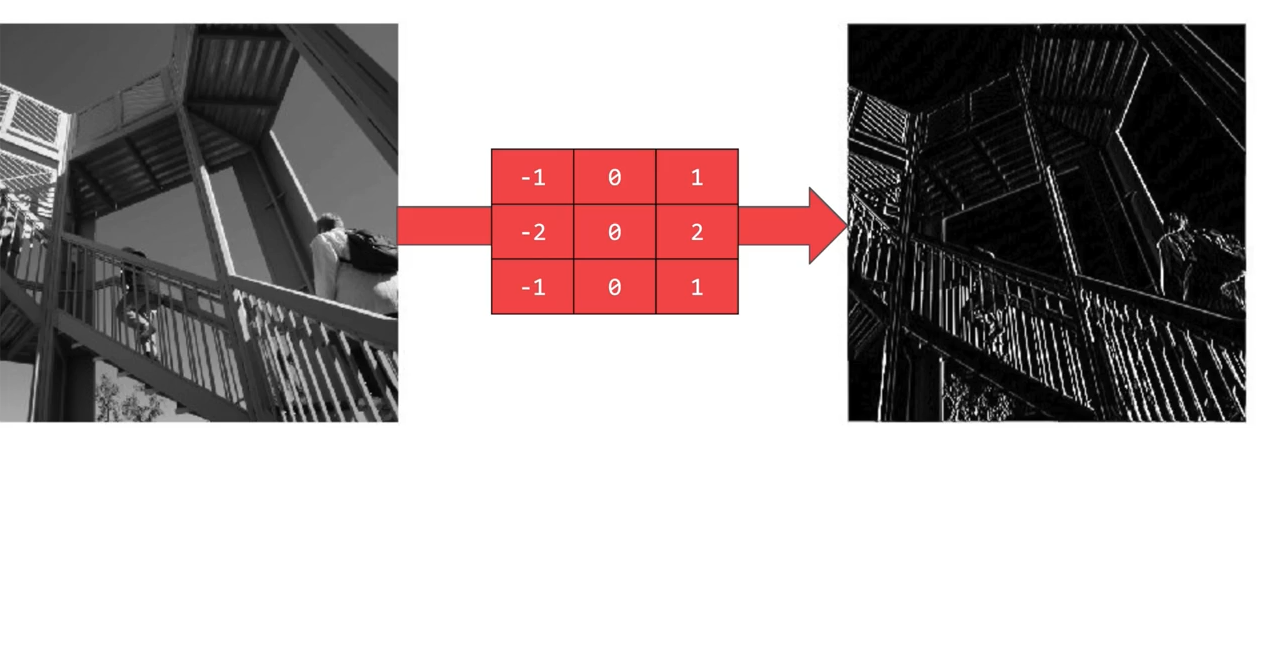

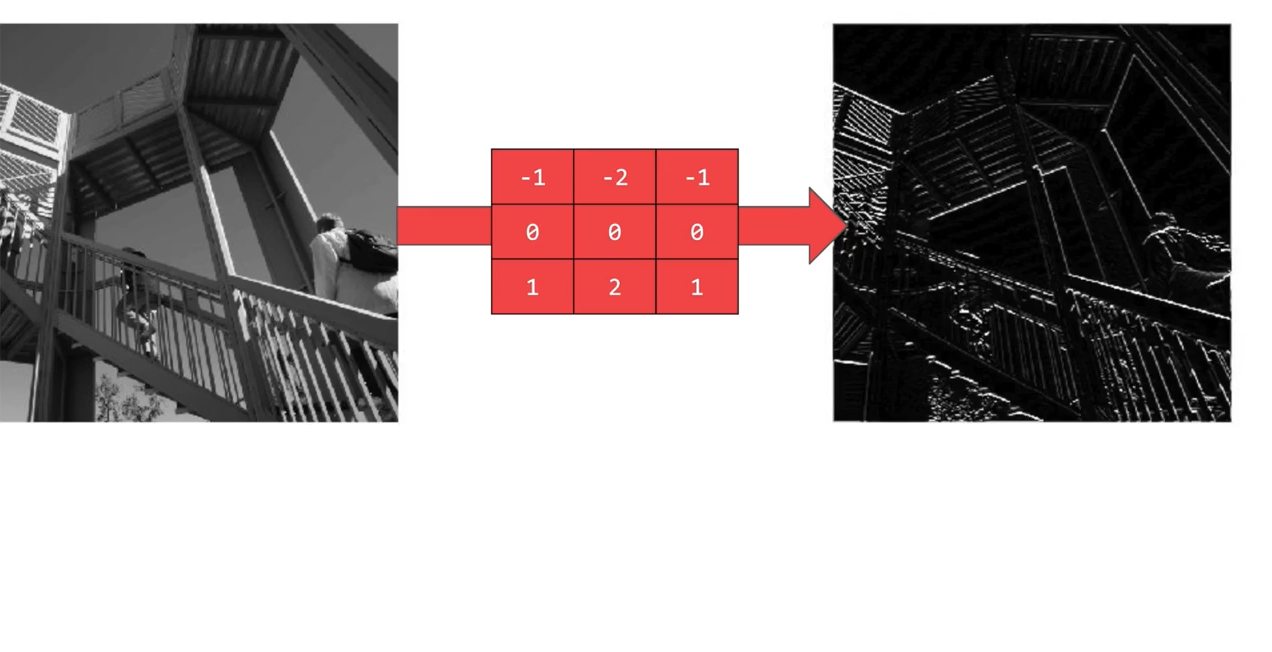

### Pooling

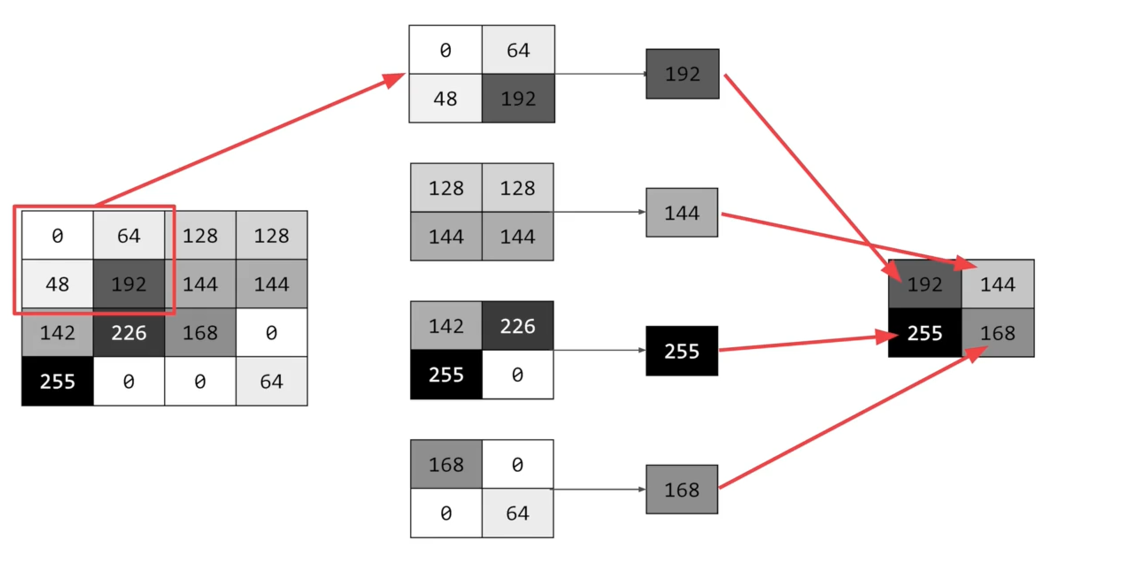

In [1]:
# SECTION DIVIDER

## Implementing Convolutional Layers

### DNN

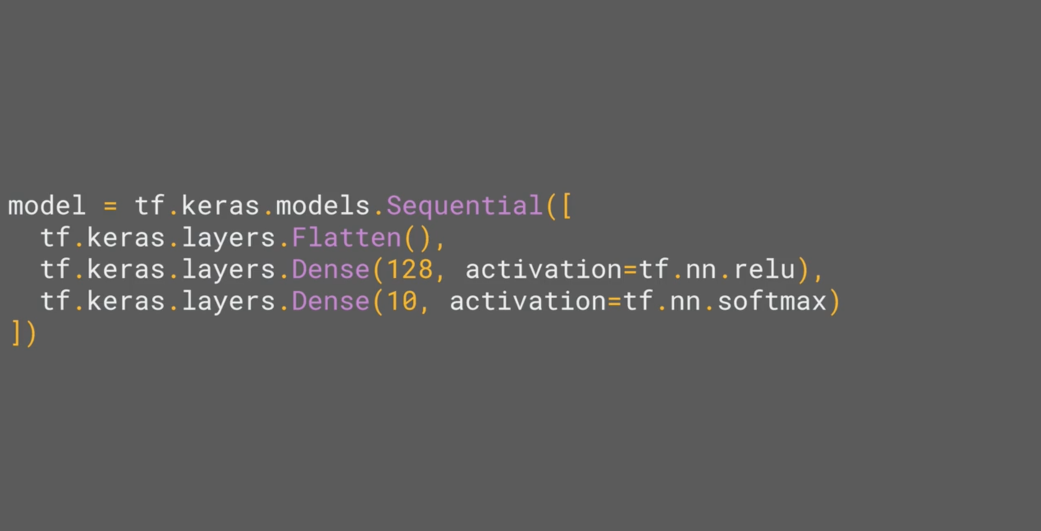

### CNN & Pooling

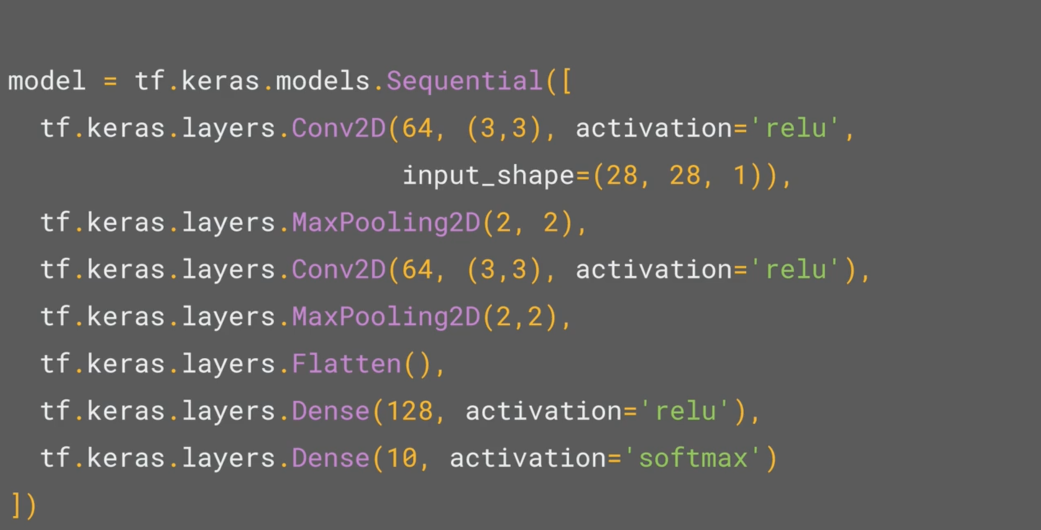

In [2]:
# SECTION DIVIDER

## Implementing Pooling Layers

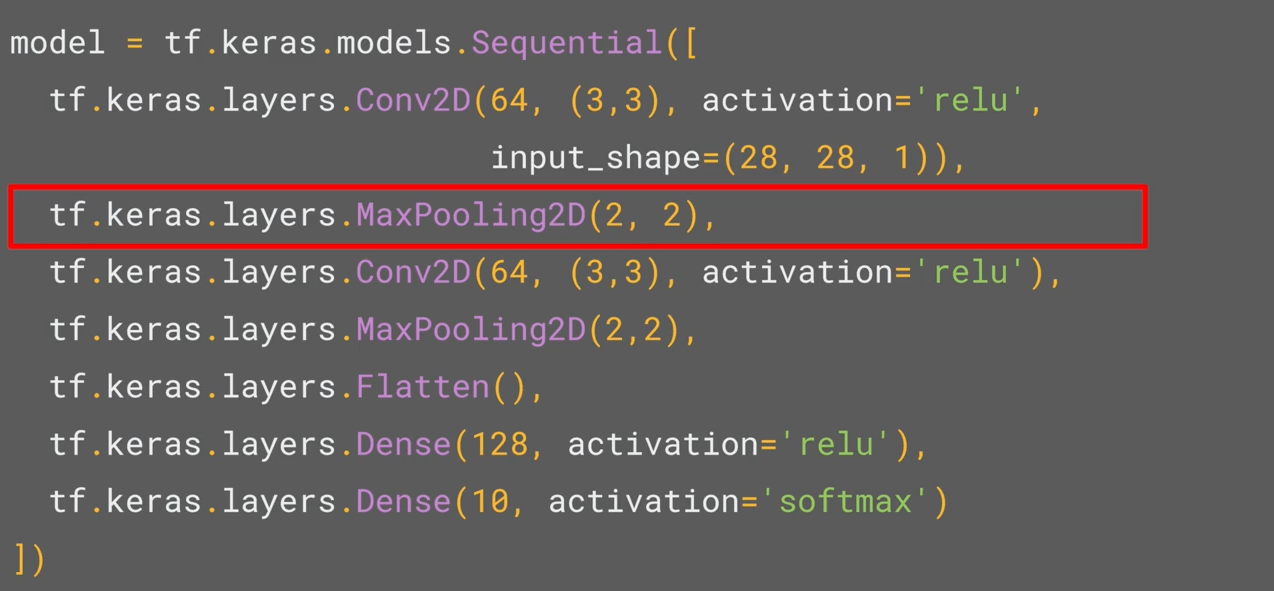

`model.summary()`

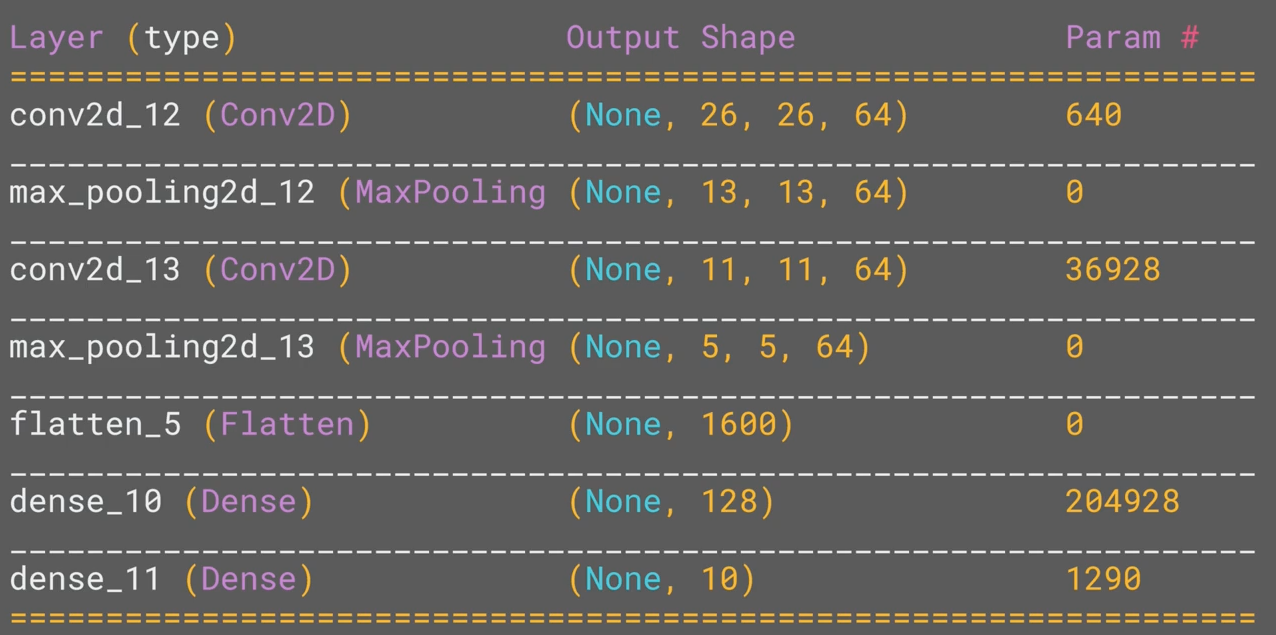

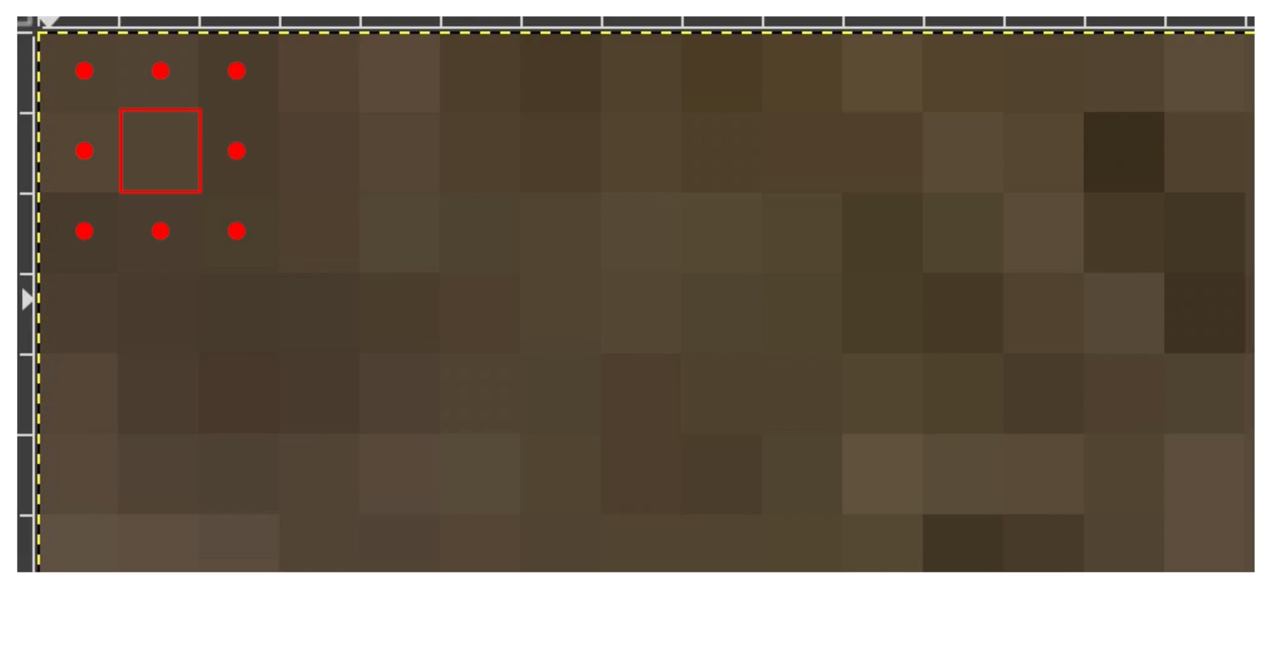

In [3]:
# SECTION DIVIDER

## Improving Computer Vision Accuracy using Convolutions Code

In [4]:
# Shallow neural network
import tensorflow as tf

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5019 - accuracy: 0.8225
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3752 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3387 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3151 - accuracy: 0.8864
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2984 - accuracy: 0.8909

MODEL EVALUATION:
313/313 [==============================] - 1s 2ms/step - loss: 0.3526 - accuracy: 0.8751


In [6]:
# Convolutional neural network
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [7]:
# Visualizing the convolutions and pooling
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 33ms/step


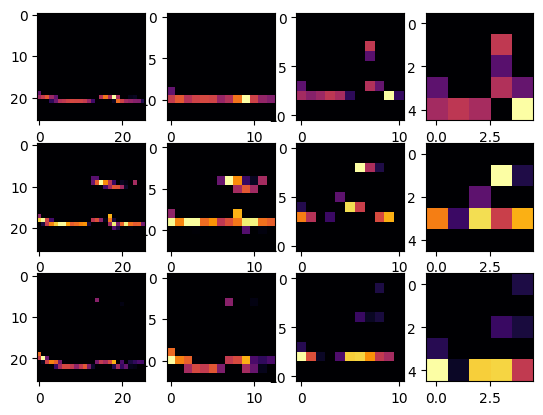

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [9]:
# SECTION DIVIDER

## Exploring Convolutions Code

In [10]:
from scipy.datasets import ascent

ascent_image = ascent()

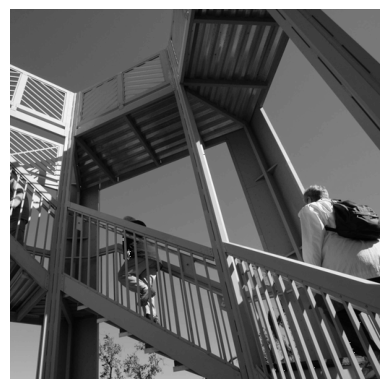

In [11]:
import matplotlib.pyplot as plt

plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [12]:
import numpy as np

image_transformed = np.copy(ascent_image)

size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

In [13]:
# Experiment with different values and see the effect
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

weight  = 1

In [14]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
      convolution = convolution + (ascent_image[x-1, y] * filter[0][1])
      convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])
      convolution = convolution + (ascent_image[x, y-1] * filter[1][0])
      convolution = convolution + (ascent_image[x, y] * filter[1][1])
      convolution = convolution + (ascent_image[x, y+1] * filter[1][2])
      convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])
      convolution = convolution + (ascent_image[x+1, y] * filter[2][1])
      convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])

      convolution = convolution * weight

      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255

      image_transformed[x, y] = convolution

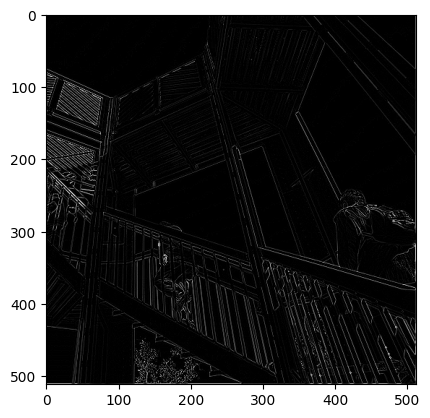

In [15]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()

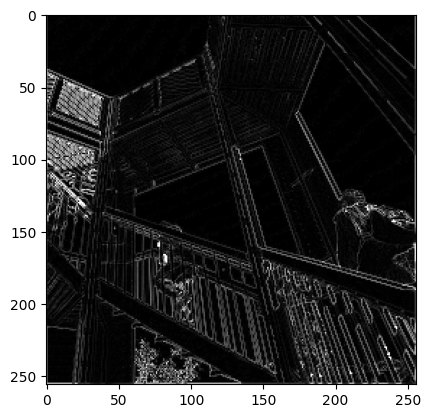

In [16]:
# Effect of Max Pooling
new_x = int(size_x/2)
new_y = int(size_y/2)

newImage = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):

    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])

    newImage[int(x/2),int(y/2)] = max(pixels)

plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()

In [17]:
# SECTION DIVIDER

## Improve MNIST with Convolutions